In [25]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import openrouteservice as ors
import time
from collections import namedtuple
import numpy as np

In [2]:
load_dotenv()

True

In [3]:
directory = os.getcwd()
os.chdir(directory)

In [4]:
centroid_pairing_df = pd.read_csv(r"../../data/Cluster_data/five_point_Centroid_MRT pairing data.csv.csv")

In [5]:
centroid_pairing_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
centroid_pairing_df.loc[:,"distance":].describe()

,distance,cycle_duration,suitability,steepness,bus_duration,time_difference
count,875.000000,875.000000,874.000000,874.000000,875.000000,875.000000
mean,1.311317,8.614457,6.787154,-0.047923,12.626114,-4.011657
std,1.701178,10.520412,0.795334,0.431361,9.097032,7.485469
min,0.023000,0.133333,5.000000,-1.000000,0.033333,-40.233333
25%,0.601500,4.091667,6.149623,0.000000,7.408333,-6.366667
50%,0.878000,5.900000,6.820978,0.000000,10.300000,-4.100000
75%,1.311000,8.783333,7.437608,0.000000,14.191667,-2.208333
max,24.197000,149.550000,8.510564,1.378013,72.400000,127.433333


array([[<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'cycle_duration'}>],
       [<AxesSubplot:title={'center':'suitability'}>,
        <AxesSubplot:title={'center':'steepness'}>],
       [<AxesSubplot:title={'center':'bus_duration'}>,
        <AxesSubplot:title={'center':'time_difference'}>]], dtype=object)

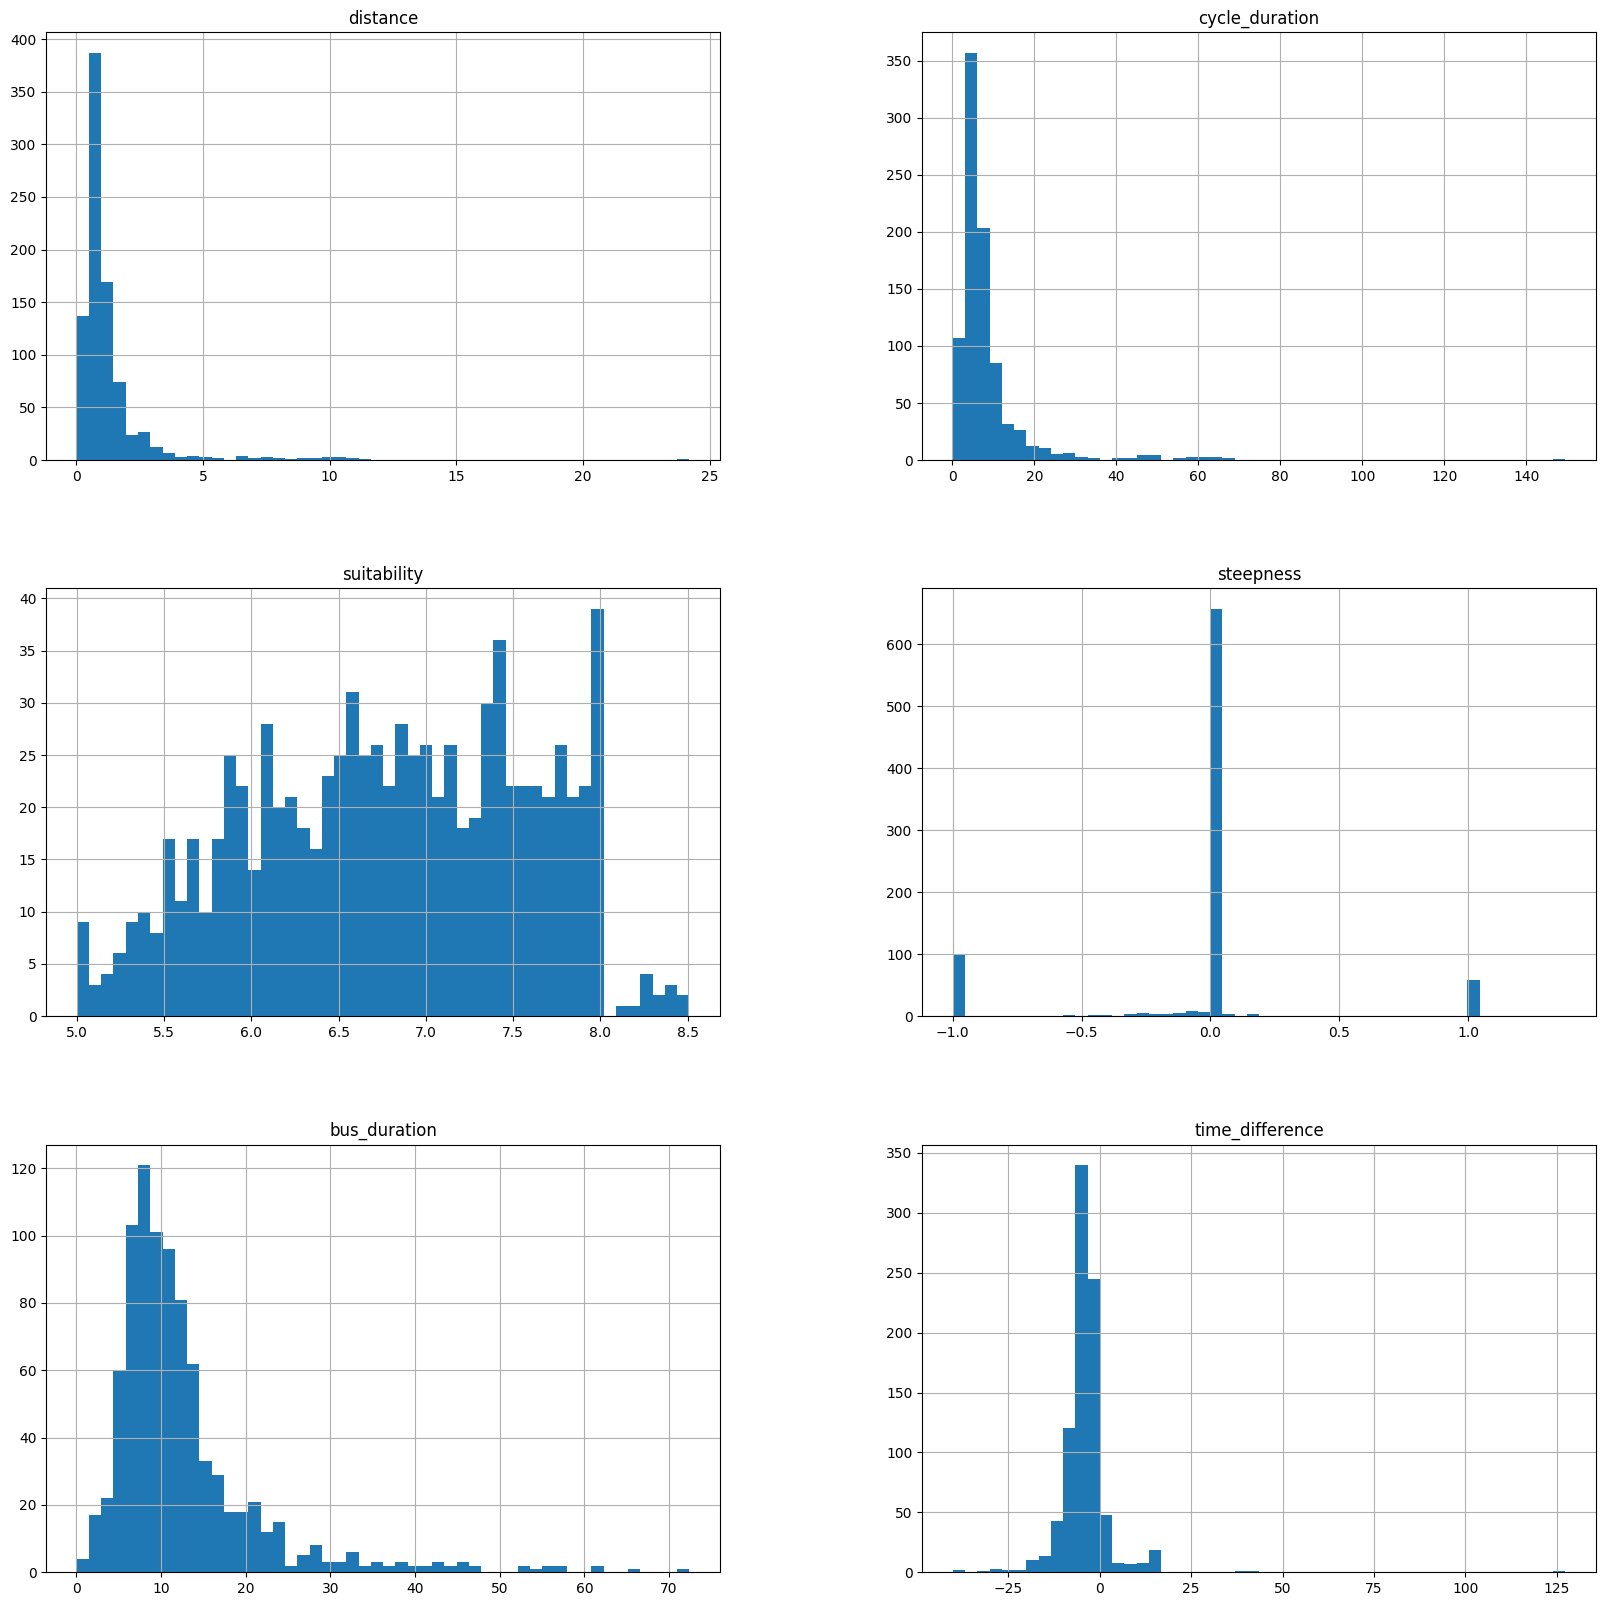

In [7]:
centroid_pairing_df.loc[:,"distance":].hist(bins=50, figsize=(20,20))

In [8]:
q1 = centroid_pairing_df['distance'].quantile(0.25)
q3 = centroid_pairing_df['distance'].quantile(0.75)
IQR = q3-q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

cond = (centroid_pairing_df['distance'] < lower_bound) | (centroid_pairing_df['distance'] > upper_bound)

outliers = centroid_pairing_df[cond]

In [9]:
outliers.shape

(90, 19)

In [10]:
outliers.index

Index([ 13,  14,  32,  33,  34,  81,  83,  84, 118, 141, 142, 144, 150, 151,
       152, 153, 154, 230, 231, 232, 233, 263, 271, 285, 286, 287, 288, 289,
       294, 300, 301, 302, 303, 304, 345, 346, 347, 348, 349, 369, 385, 387,
       388, 389, 405, 406, 456, 458, 459, 460, 461, 462, 463, 464, 515, 516,
       517, 518, 519, 533, 592, 593, 594, 604, 653, 726, 728, 729, 767, 807,
       810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823,
       824, 845, 846, 847, 848, 849],
      dtype='int64')

In [11]:
input = pd.read_csv(r"C:\Users\leoqi\Downloads\five_point_Centroid_MRT pairing data_for_inputer.csv")

In [12]:
input[input.isna().any(axis = 1)].shape

(23, 20)

In [13]:
from sklearn.impute import KNNImputer

In [14]:
input.loc[:,['distance','cycle_duration']].isna().sum()

distance           0
cycle_duration    17
dtype: int64

In [15]:
imputer = KNNImputer(n_neighbors=2, weights="uniform", add_indicator= True)

In [16]:
X = input.loc[:,['distance','cycle_duration']]
X

,distance,cycle_duration
0,1.331,9.233333
1,0.407,2.633333
2,0.599,4.216667
3,0.537,3.633333
4,1.193,7.616667
...,...,...
870,0.581,3.966667
871,0.547,3.983333
872,0.348,2.100000
873,1.086,7.583333


In [17]:
X_inputed = imputer.fit_transform(X)

In [18]:
df = pd.DataFrame(X_inputed, columns = ['distance','cycle_duration',"approximated?"])

In [19]:
centroid_pairing_df[['distance','cycle_duration']] = df[['distance','cycle_duration']]
centroid_pairing_df['approximated?'] = df['approximated?']

In [20]:
centroid_pairing_df['time_difference'] = centroid_pairing_df['cycle_duration'] - centroid_pairing_df['bus_duration']

In [28]:
cond = centroid_pairing_df['approximated?'] == 1

centroid_pairing_df.loc[cond,['cycle_route','suitability','steepness']] = np.nan

In [29]:
centroid_pairing_df[cond]

,Latitude_x,Longitude_x,index_x,join_key,MRT.Name,Latitude_y,Longitude_y,index_y,euclidean_distance,coordinate_pair,cycle_route,bus_route,distance,cycle_duration,centroid_name,suitability,steepness,bus_duration,time_difference,approximated?
13,1.373664,103.850117,356,A,ANG MO KIO MRT STATION,1.369429,103.849455,52,0.476719,"coordinate_pair(lat_x=1.373664458063386, lon_x...",NaN,['Origin to Destination'],1.6,10.266667,CHENG SAN CREST,NaN,NaN,10.283333,-0.016667,1.0
14,1.371411,103.853421,179,A,ANG MO KIO MRT STATION,1.369429,103.849455,52,0.492934,"coordinate_pair(lat_x=1.3714108947267731, lon_...",NaN,['Origin to Destination'],0.8,5.683333,CHENG SAN COURT,NaN,NaN,10.466667,-4.783333,1.0
81,1.325239,103.813176,867,A,BOTANIC GARDENS MRT STATION,1.322114,103.814984,58,0.401472,"coordinate_pair(lat_x=1.325239208887994, lon_x...",NaN,['Origin to Destination'],0.5,4.250000,ADAM GREEN,NaN,NaN,9.566667,-5.316667,1.0
83,1.322179,103.810420,1089,A,BOTANIC GARDENS MRT STATION,1.322114,103.814984,58,0.507510,"coordinate_pair(lat_x=1.322178528249936, lon_x...",NaN,['Origin to Destination'],0.6,3.858333,14 QUEEN'S ROAD,NaN,NaN,11.266667,-7.408333,1.0
84,1.327545,103.815575,880,A,BOTANIC GARDENS MRT STATION,1.322114,103.814984,58,0.607457,"coordinate_pair(lat_x=1.327544735967185, lon_x...",NaN,['Origin to Destination'],1.0,6.558333,CAMDEN PARK,NaN,NaN,14.133333,-7.575000,1.0
141,1.443414,103.826110,902,A,CANBERRA MRT STATION,1.443077,103.829703,157,0.401150,"coordinate_pair(lat_x=1.443413893128895, lon_x...",NaN,['Origin to Destination'],0.5,4.250000,SEMBAWANG SPRINGS ESTATE,NaN,NaN,13.783333,-9.533333,1.0
142,1.438431,103.828648,579,A,CANBERRA MRT STATION,1.443077,103.829703,157,0.529708,"coordinate_pair(lat_x=1.4384310054882588, lon_...",NaN,['Origin to Destination'],1.8,12.200000,SEMBAWANG SPRINGS ESTATE,NaN,NaN,23.000000,-10.800000,1.0
144,1.439324,103.825855,983,A,CANBERRA MRT STATION,1.443077,103.829703,157,0.597539,"coordinate_pair(lat_x=1.4393236399823974, lon_...",NaN,['Origin to Destination'],1.3,8.333333,SEMBAWANG SPRINGS ESTATE,NaN,NaN,19.966667,-11.633333,1.0
369,1.317125,103.877749,260,A,KALLANG MRT STATION,1.311489,103.871386,121,0.945021,"coordinate_pair(lat_x=1.3171248251194296, lon_...",NaN,['Origin to Destination'],1.4,7.391667,PAN-I COMPLEX,NaN,NaN,20.366667,-12.975000,1.0
387,1.303870,103.785938,957,A,KENT RIDGE MRT STATION,1.293537,103.784572,60,1.158977,"coordinate_pair(lat_x=1.3038701661406176, lon_...",NaN,['Origin to Destination'],1.8,12.200000,ROCHESTER PARK,NaN,NaN,21.050000,-8.850000,1.0


In [30]:
centroid_pairing_df.to_csv(r"../../data/Cluster_data/five_point_Centroid_MRT pairing data fixed.csv")